# Stochastic Volatility Inspired Model
------------------
> **Idriss Afra**

This project aims to construct the Equity implied volatility surface under the Stochastic Volatility Inspired (SVI) model.

## The SVI Parameterization

The SVI (Stochastic Volatility Inspired) model is a parametric formulation that uses five parameters for each listed expiry, denoted by $\Gamma_T :=$ {$a, b, \rho, m, \sigma$}. It models the implied total variance as a function of log-moneyness using the following equation:

$$
\omega(k, \Gamma_T) = \sigma_{Imp}^{2}(k, \Gamma_T) . T = a + b × \left[\rho (k - m) + \sqrt{(k-m)^2 + \sigma^2} \space \right]
$$

Where :

$$
k := ln \left( \frac{Strike}{F_T} \right) \in ℝ, \space a ∈ ℝ, \space b ≥ 0, \space |\rho| \lt 1, \space m \in ℝ, \space \sigma \gt 0, \space a + b \sigma \sqrt{1-\rho^2} \ge 0
$$

The final condition ensures that the implied total variance remains strictly positive. Note that log-forward moneyness is used for scaling purposes.

The five SVI parameters influence the shape of the implied total variance curve in the following ways:
* $a$ : Sets the overall level of total variance. Increasing $a$ shifts the entire skew upward, raising the general variance level.
* $b$ : Controls the slope between the left and right wings (convexity). A higher $b$ tightens the skew, making the wings steeper.
* $\rho$ : Determines the orientation of the skew. Increasing $\rho$ results in a counter-clockwise rotation, affecting the asymmetry of the skew.
* $m$ : Shifts the skew horizontally. A higher $m$ moves the skew to the right, altering the location of the minimum variance.
* $\sigma$ : Influences the curvature at the money. Increasing $\sigma$ flattens the center of the skew, reducing the ATM curvature.

These parameters allow the SVI model to flexibly capture the typical shapes observed in implied volatility surfaces.

## The Butterfly Arbitrage

To ensure the butterfly arbitrage-free under the SVI model, the probability density function of the terminal asset price $S_T$ must remain non-negative:

$$
f_{S_T}(K) = e^{rT} × \frac{d^2C_{BS}(K, T)}{dK^2}\gt 0
$$

And hence:

$$
p(k) := \frac{d^2C_{BS}(k, \omega(k, \Gamma_T))}{dK^2}\gt 0
$$

Where:

$$
\begin{align}
C_{BS}(k, \omega(k, \Gamma_T)) & = S e^{-qT} × \left(N(d_1) - e^k N(d_2)\right) \\
d_1 & = \frac{-k + ω(k, Γ_T) / 2}{\sqrt{ω(k, Γ_T)}} \\
d_2 & = d_1 - \sqrt{ω(k, Γ_T)}
\end{align}
$$

By differentiating the above Black-Scholes formula for any $k \in ℝ$, we get:
$$
p(k) = \frac{g(k)}{\sqrt{2Π.ω(k, Γ_T)}} × e^{-\frac{d_2^2}{2}}
$$
Where :
$$
g(k) := \left(1- \frac{k.ω'(k, Γ_T)}{2.ω(k, Γ_T)}\right)^2 - \frac{ω'(k, Γ_T)^2}{4} × \left( \frac{1}{ω(k, Γ_T)} + \frac{1}{4}\right) + \frac{ω''(k, Γ_T)}{2}
$$

<br>Therefore, the Butterfly free-arbitrage final condition is : $ g(k) > 0 $



## Volatility on the Wings

To guarantee the absence of butterfly arbitrage, special attention must be given to the wings of the volatility skew. Specifically, we need to make sure that the probability density function of $S_T$, and consequently the function $g(k)$, remains non-negative for extreme strike values.

Since:
* For ${k \to +∞}$ : $\omega_R(k, Γ_T) ≈ b(\rho + 1)k + [a-bm(\rho + 1)] $
* For ${k \to -∞}$ : $\omega_L(k, Γ_T) ≈ b(\rho - 1)k + [a-bm(\rho - 1)] $

Then for extreme strikes, $g(k)$ turns to the following quadratic equation:
$$
g(k) ≈ \frac{\beta^2}{4} \left(1 - \frac{\beta^2}{4}\right) k^2 + \frac{1}{4} \left(4\alpha\beta - \beta^3 - \frac{\alpha\beta^3}{2}\right) k + \frac{1}{4} \left(4\alpha^2 - \alpha\beta^2 - \frac{\alpha^2\beta^2}{4}\right)
$$
Where:
* For ${k \to +∞}$ : $\alpha=a - bm(\rho + 1)$ and $\beta=b(\rho + 1)$
* For ${k \to -∞}$ : $\alpha=a - bm(\rho - 1)$ and $\beta=b(\rho - 1)$

We avoid butterfly arbitrages by ensuring that the discriminants $Δ_R$ and $Δ_L$ are negative and that $\frac{\beta^2}{4} \left(1 - \frac{\beta^2}{4}\right) \gt 0$. These conditions lead to the following constraints :
* Constraint 1 : $(a-mb(\rho+1))(4-a+mb(\rho+1))-b^2(\rho+1)^2 > 0$
* Constraint 2 : $(a-mb(\rho-1))(4-a+mb(\rho-1))-b^2(\rho-1)^2 > 0$
* Constraint 3 : $0 < b^2(\rho+1)^2 < 4$
* Constraint 4 : $0 < b^2(\rho-1)^2 < 4$

## The Calendar Arbitrage

To ensure the Calendar arbitrage-free under the SVI model, we must impose the following constraint for all the listed options expiries $(T_i)_{1\le i \le n}$ : $ω(k, Γ_{T_i}) > ω(k, Γ_{T_{i-1}})$.
<br> In practice, we will verify that this inequality holds for moneyness values ranging from $0.01\%$ to $200\%$.


## SVI Model Calibration

The calibration of the SVI model goes through a global minimization process to replicate the market-implied volatilities.
<br> Hence, for each market expiry $T$ :
$$
(\sigma_0^T, \alpha^T, \rho^T, \beta^T) = ArgMin_{(\sigma_0, \alpha, \rho, \beta)} \frac{1}{N_T} ∑_{K_i ∈ Market}\left(\sigma_{SABR}(K,F_0, \sigma_0, \alpha, \rho, \beta) - \sigma_{K_i, T}^{Market}\right)^{2}
$$


## SVI's Parameters Boundaries

To ensure an efficient calibration of the SVI model that respects the model's conditions and avoids arbitrages, we establish the following boundaries for each parameter:

* Parameter $a$ :
The minimum of the SVI total variance occurs at the point : $ k^* = m - \frac{\rho \sigma}{\sqrt{1 - \rho^2}} $, and its value is : $ w_{min}(k) = a + b \sigma \sqrt{1 - \rho^2} $. To ensure a positive minimum variance, we require that: : $ a + b \sigma \sqrt{1 - \rho^2} > 0 $. For a stronger condition, we choose : $ a > 0 $.
Therefore, the condition on $a$ turns to : $
0 < 10^{-5} \le a \le max({w}^{market}) $

* Parameter $\rho$ :
The correlation coefficient must lie in the interval : $ ]-1 , 1[ $

* Parameter $m$ :
This parameter controls the horizontal translation of the skew. We can floor and cap it using reasonable values based on the market's moneyness : $
2 \times min_i({k_i}^{market}) \le m \le 2 \times max_i({k_i}^{market})$

* Parameter $\sigma$ :
To ensure proper curvature near the ATM, the value of $\sigma$ should not be too large. Therefore, we set the following boundaries : $0.01 \le \sigma \le 1$

* Parameter $b$ :
Since call prices approach $0$ as $k$ tends to $+∞$, $d_1(k)$ must tend to $-∞$ as $k$ tends to $+∞$ (according to Rogers' Lemma).Therefore, we require : $
limsup_{k \to +∞} \frac{w(k)}{2k} = \frac{b (\rho + 1)}{2} \lt 1.
$ 
To ensure this condition is met, $b$ must satisfy : $
10^{-3} \le b \lt 1 $

## SVI Model Implementation

In [1]:
import numpy as np
from scipy.optimize import minimize
import sys
import matplotlib.pyplot as plt
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

class svi_model:
    """
    The SVI model class.
    """
    def __init__(self):
        """
        Init method.
        """
        self.params = np.array([])
        print("The SVI model class was successfully initialized !\n")
    
    def _v2T(self, T, k, params=None) :
        """
        V2T formula under the SVI model.
        The log-moneyness k can be a scalar or an array.
        The method returns the SVI total variances.
        /!\ For internal use only /!\
        """
        if params is None: params = self.params[T]
        a, b, rho, m, sigma = params[0], params[1], params[2], params[3], params[4]
        return a + b * (rho * (k - m) + np.sqrt((k - m)**2 + sigma **2))

    def params_calibration(self, T, k, v2T) :
        """
        SVI model calibration : The method returns the calibrated SVI total variances.
        T is an array of listed options expiries.
        The constraints ensure the Calendar and the Butterfly arbitrages-free.
        """
        print("Starting the SVI calibration process...\n")
        results = dict()
        # SVI calibration on a set of market expiries
        parameters0 = np.array([min(v2T[0]) / 2, 0.5, -0.2, 0.1, 0.2]) # a, b, rho, m, sigma : Chosen arbitrary
        constraints = ({'type': 'ineq', 'fun':self._constraint1}, {'type': 'ineq', 'fun':self._constraint2}, 
                       {'type': 'ineq', 'fun':self._constraint3}, {'type': 'ineq', 'fun':self._constraint4})
        res = minimize(self._obj_func, x0=parameters0, args=(T[0], k[0], v2T[0]), 
                       bounds=((1e-06, max(v2T[0])), (1e-06, 0.99), (-0.99, 0.99), (3*min(k[0]), 3*max(k[0])),\
                               (1e-06, 0.99)), constraints=constraints, options={"maxiter" : 2000}, tol=1e-8)
        results[T[0]] = res.x
        print("/!\ Expiry " + str(round(T[0], 4)) + " was successfully calibrated with a " \
        "convergence error of : " + str(round(self._obj_func(res.x, T[0], k[0], v2T[0]), 2)) + " Bps.\n")
        for i in range(1, len(T)) :
            parameters0 = np.array([min(v2T[i]) / 2, 0.5, -0.2, 0.1, 0.2]) # a, b, rho, m, sigma : Chosen arbitrary
            last_index = T.index(list(results.keys())[-1])
            constraints = ({'type': 'ineq', 'fun':self._constraint1}, {'type': 'ineq', 'fun':self._constraint2}, 
                           {'type': 'ineq', 'fun':self._constraint3}, {'type': 'ineq', 'fun':self._constraint4}, 
                           {'type': 'ineq', 'fun':self._constraint5, 'args': (T[i], T[last_index], k[i], k[last_index],\
                                                                              results[T[last_index]])})
            res = minimize(self._obj_func, x0=parameters0, args=(T[i], k[i], v2T[i]), 
                           bounds=((1e-06, max(v2T[i])), (1e-06, 0.99), (-0.99, 0.99), (3*min(k[i]), 3*max(k[i])),\
                                   (1e-06, 0.99)), constraints=constraints, options={"maxiter" : 2000}, tol=1e-8)
            if res.success == True : 
                # Successful calibration
                results[T[i]] = res.x
                print("/!\ Expiry " + str(round(T[i], 4)) + " was successfully calibrated with a " \
                "convergence error of : " + str(round(self._obj_func(res.x, T[i], k[i], v2T[i]), 2)) + " Bps.\n")
            else : 
                # We ignore the listed expiries on which the calibration has failed
                print("/!\ Expiry " + str(round(T[i], 4)) + " was igonred as its " \
                "causing arbitrages on the wings.\n")
        self.params = results
        print("The SVI calibration has successfully finished !")

    def _obj_func(self, parameters, T, k, v2T) :
        """
        The objective method of the SVI calibration.
        /!\ For internal use only /!\
        """
        svi  = self._v2T(T, k, parameters)
        sse = 0
        for i in range(len(k)) :
            sse += (np.sqrt(svi[i] / T) - np.sqrt(v2T[i] / T))**2
        return 10000 * sse / len(k)

    def _constraint1(self, parameters, eps=1e-8):
        """
        1st constraint.
        /!\ For internal use only /!\
        """
        a, b, rho, m, sigma = parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]
        return (a - m * b * (rho + 1)) * (4 - a + m * b * (rho + 1)) - b**2 * (rho + 1)**2 - eps

    def _constraint2(self, parameters, eps=1e-8):
        """
        2nd constraint.
        /!\ For internal use only /!\
        """
        a, b, rho, m, sigma = parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]
        return (a - m * b * (rho - 1)) * (4 - a + m * b * (rho - 1)) - b**2 * (rho - 1)**2 - eps

    def _constraint3(self, parameters, eps=1e-8):
        """
        3th constraint.
        /!\ For internal use only /!\
        """
        a, b, rho, m, sigma = parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]
        return 4 - b**2 * (rho + 1)**2 - eps

    def _constraint4(self, parameters, eps=1e-8):
        """
        4th constraint.
        /!\ For internal use only /!\
        """
        a, b, rho, m, sigma = parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]
        return 4 - b**2 * (rho - 1)**2 - eps

    def _constraint5(self, parameters, T_current, T_previous, k_current, k_previous, params_previous, min_k=np.log(0.0001),\
                    max_k=np.log(2)):
        """
        5th constraint : Calendar spread free-arbitrage condition.
        /!\ For internal use only /!\
        """
        log_moneyness = np.linspace(min_k, max_k, 10000, endpoint=True)
        log_moneyness = np.concatenate((k_previous, k_current, log_moneyness))
        log_moneyness = np.unique(np.sort(log_moneyness))
        v2T_previous = self._v2T(T_previous, log_moneyness, params_previous)
        v2T  = self._v2T(T_current, log_moneyness, parameters)
        return -100000 if (False in (v2T_previous < v2T)) else 100000
    
    def get_v2T(self, T, k, interp_meth='cubic', min_k=np.log(0.5), max_k=np.log(1.5)) :
        """
        V2T formula under the SVI model.
        Expiry T : interp_meth (Cubic by default) V2T interpolation & Flat V2T extrapolation.
        Log-moneyness k : SVI V2T formula within [50% - 150%] & Flat V2T extrapolation.
        """
        if self.params == np.array([]) : return sys.exit("The SVI parameters should be calibrated first through the " \
                                                         "params_calibration method.")
        expiries = list(self.params.keys())
        k = min(max_k, max(min_k, k))
        if (T <= expiries[0]) or (T >= expiries[-1]) or (T in expiries):
            T = min(expiries[-1], max(expiries[0], T))
            return self._v2T(T, k)
        else:
            v2T_k = [self._v2T(exp, k) for exp in expiries]
            return interp1d(expiries, v2T_k, kind=interp_meth)(T)
        
    def plot_svi_surface(self, total_var=False, min_k=np.log(0.7), max_k=np.log(1.3), min_T=0.5, n_interv=81):
        """
        SVI plotter.
        """
        if self.params == np.array([]) : return sys.exit("The SVI parameters should be calibrated first through the " \
                                                         "params_calibration method.")
        K = np.linspace(min_k, max_k, n_interv, endpoint=True)
        T = np.linspace(min_T, list(self.params.keys())[-1], n_interv, endpoint=True)
        K, T = np.meshgrid(K, T)
        vols = np.zeros(shape=K.shape)
        for t in range(vols.shape[0]):
            for k in range(vols.shape[1]):
                v2T = self.get_v2T(T[t][k], K[t][k])
                vols[t, k] = v2T if total_var else np.sqrt(v2T) / T[t][k]

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        surf = ax.plot_surface(K, T, vols, cmap=cm.coolwarm, linewidth=0, antialiased=True)
        plt.title("Implied SVI V2T Surface" if total_var else "Implied SVI Volatility Surface")
        plt.show()

## Application : CAC40 Listed Index Options

Now, let's apply the SVI model to construct the CAC40 implied volatility surface. To achieve this, we use the CAC40 implied forwards and volatilities as of February 12, 2025, computed in the following project : [Equity Implied Volatility Surface](https://github.com/Idriss-Afra/Equity-Implied-Volatility-Surface/blob/main/Equity%20Implied%20Volatility%20Surface.ipynb).

In [2]:
import datetime
import pandas as pd
from scipy.interpolate import interp1d

as_of_date = datetime.date(2025, 2, 12)
print("Analysis Date : ", as_of_date)
print("-----------------------------------------------")

eq_underlying = "CAC40"
S0 = 8042.19
print(eq_underlying + " Close Price : ", S0)
print("-----------------------------------------------")

option_data = pd.read_csv("MarketData/" + eq_underlying + "_MarketData_" + as_of_date.strftime('%d%m%Y') + ".csv")
print(eq_underlying + " Option Data :")
print(option_data)
print("-----------------------------------------------")

rate_underlying = "EURIBOR6M"
print(rate_underlying + " Zero-Coupon Rate Curve :")
rates_data = pd.read_csv("MarketData/" + rate_underlying +  "_ZCRates_" + as_of_date.strftime('%d%m%Y') + ".csv")
print(rates_data)

# ZC Rate : Cubic Spline Interpolation & Extrapolation
zc_rate = interp1d(rates_data['Expiry'], rates_data['ZCRate'], kind='cubic', fill_value="extrapolate")

Analysis Date :  2025-02-12
-----------------------------------------------
CAC40 Close Price :  8042.19
-----------------------------------------------
CAC40 Option Data :
       Expiry   Strike    Call      Put  Repo+Dividend      Forward  \
0    0.024658   7925.0  151.83    27.92      -0.007517  8048.999044   
1    0.024658   7950.0  132.52    33.59      -0.007517  8048.999044   
2    0.024658   7975.0  114.13    40.18      -0.007517  8048.999044   
3    0.024658   8000.0   96.79    47.82      -0.007517  8048.999044   
4    0.024658   8025.0   81.15    57.17      -0.007517  8048.999044   
..        ...      ...     ...      ...            ...          ...   
137  4.857534   8000.0  977.10  1115.35       0.026932  7847.492862   
138  4.857534   8400.0  808.07  1308.91       0.026932  7847.492862   
139  4.857534   8800.0  665.26  1528.71       0.026932  7847.492862   
140  4.857534   9600.0  450.36  2039.01       0.026932  7847.492862   
141  4.857534  10400.0  312.97  2626.83       

First, let's gather the data and store it in global dictionaries:

In [3]:
def collect_data(option_data):
    """
    Collects data and store it in dictionaries.
    """
    implied_repos_and_divs, implied_forwards, strikes, implied_vols  = dict(), dict(), dict(), dict()
    expiries = np.sort(np.unique(option_data['Expiry']))
    for exp in expiries :
        df = option_data[option_data['Expiry'] == exp]
        implied_repos_and_divs[exp] = float(np.unique(df['Repo+Dividend']))
        implied_forwards[exp] = float(np.unique(df['Forward']))
        df = df.sort_values(by=['Strike'])
        strikes[exp], implied_vols[exp] = list(df['Strike']), list(df['Volatility']) 
    return {"Forwards" : implied_forwards, "Strikes" : strikes, "Volatilities" : implied_vols}    

# Collected Data
data = collect_data(option_data)
implied_forwards = data["Forwards"]
listed_expiries = list(implied_forwards.keys())
market_strikes = data["Strikes"]
implied_vols = data["Volatilities"]

# Implied v2T(T, k)
market_log_moneyness = [np.log(np.array(market_strikes[exp]) / implied_forwards[exp]) for exp in listed_expiries]
implied_v2Ts = [np.array(implied_vols[exp])**2 * exp for exp in listed_expiries]

Then, let's calibrate the SVI on the listed expiries:

In [4]:
svi_model = svi_model()
svi_model.params_calibration(listed_expiries, market_log_moneyness, implied_v2Ts)
svi_params = svi_model.params
svi_expiries = list(svi_params.keys())

The SVI model class was successfully initialized !

Starting the SVI calibration process...

/!\ Expiry 0.0247 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 0.1014 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 0.1781 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 0.3507 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 0.6 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 0.8493 was igonred as its causing arbitrages on the wings.

/!\ Expiry 1.0986 was igonred as its causing arbitrages on the wings.

/!\ Expiry 1.3479 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 1.5973 was igonred as its causing arbitrages on the wings.

/!\ Expiry 1.8466 was successfully calibrated with a convergence error of : 0.0 Bps.

/!\ Expiry 2.8438 was successfully calibrated with a convergence error of : 0.01 Bps.

/!\ Expi

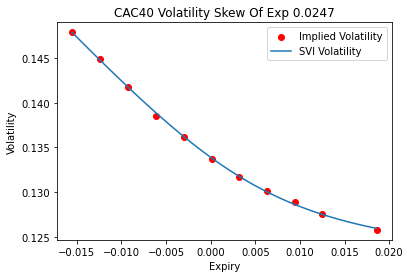

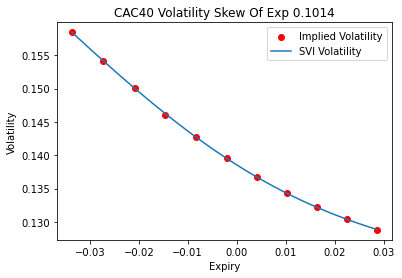

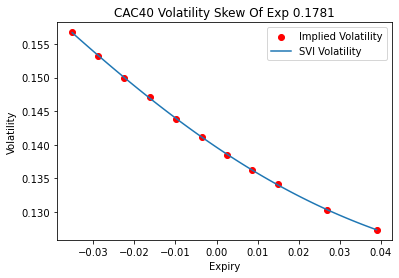

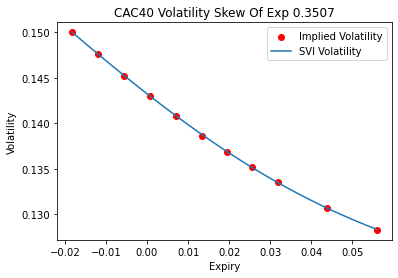

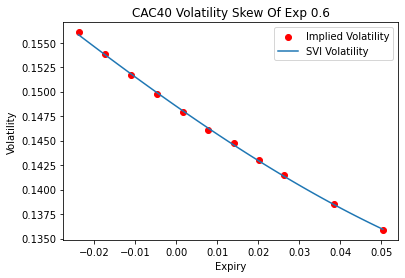

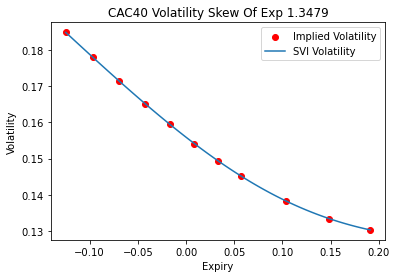

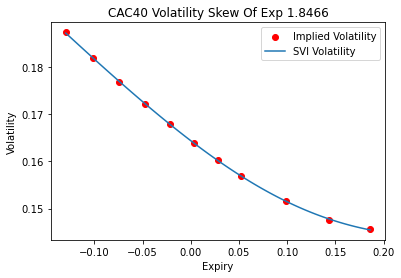

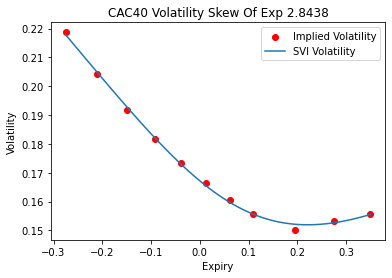

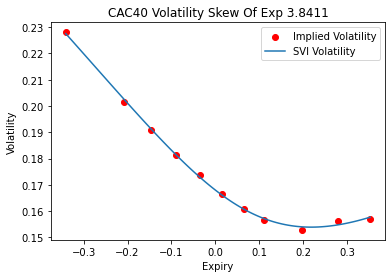

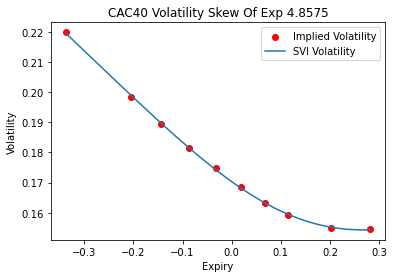

In [5]:
plt.rcParams["figure.figsize"] = (6,4)

# Filtered Implied v2T(T, k)
market_log_moneyness = [np.log(np.array(market_strikes[exp]) / implied_forwards[exp]) for exp in svi_expiries]
implied_v2Ts = [np.array(implied_vols[exp])**2 * exp for exp in svi_expiries]

for i in range(len(svi_expiries)):
    exp = svi_expiries[i]
    plt.title(eq_underlying + " Volatility Skew Of Exp " + str(round(exp, 4)))
    plt.ylabel("Volatility")
    plt.xlabel("Expiry") 
    plt.scatter(market_log_moneyness[i], np.sqrt(implied_v2Ts[i] / exp), color="red", label="Implied Volatility")
    x_axis = np.linspace(market_log_moneyness[i][0], market_log_moneyness[i][-1], 101, endpoint=True)
    svi_v2T = [np.sqrt(svi_model.get_v2T(exp, k) / exp) for k in x_axis]
    plt.plot(x_axis, svi_v2T, label="SVI Volatility")
    plt.legend(loc="upper right")
    plt.show()

Finally, we construct the SVI implied volatility and V2T surfaces:

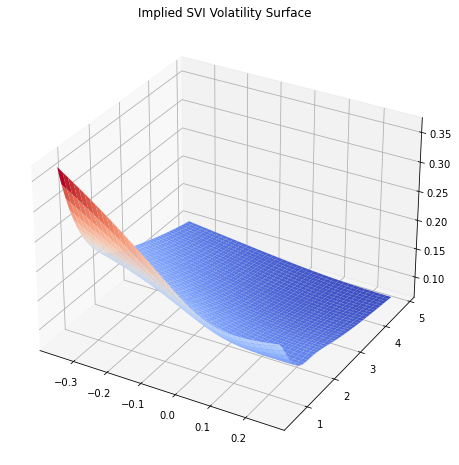

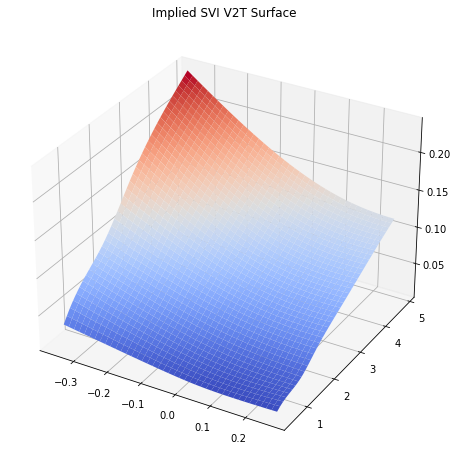

In [6]:
plt.rcParams["figure.figsize"] = (11,8)
svi_model.plot_svi_surface()
svi_model.plot_svi_surface(total_var=True)